# GDP Model: Regression with with Dimensionality Reduction:
# Principal Component Analysis (PCA)

In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import time

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA


In [2]:
# Imports data
macro = pd.read_csv('US_data_1986_2020.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
macro.shape

(420, 138)

In [3]:
# Imports data
tran_code = pd.read_csv('US_data_transform_code.csv', header=0, index_col=0, parse_dates=False)
tran_code.shape

(1, 138)

In [4]:
tran_code

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
Symbol,,,,,,,,,,,,,,,,,,,,,
Tran_code,5,5,5,5,5,5,5,5,5,5,...,2,2,1,1,1,1,1,1,1,1


In [5]:
def data_transform(x, tran_code):
    
    if tran_code == 1:
        x_tr = x        
        
    elif tran_code == 2:
        x_tr = x.diff()
            
    elif tran_code == 3:
        x_tr = x.diff().diff()
        
    elif tran_code == 4:
        x_tr = np.log(x)
        
    elif tran_code == 5:
        x_tr = np.log(x).diff()*100
    
    else :
        x_tr = np.log(x).diff().diff()*100
    
    return x_tr    

In [6]:
macro_tr=[]

for col in macro.columns:
    tr_code = tran_code[col].values
    data_tr = data_transform(macro[col], tr_code)
    macro_tr.append(data_tr)

macro_tr = pd.DataFrame(macro_tr).T

In [7]:
macro_tr

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
Code,,,,,,,,,,,,,,,,,,,,,
1986-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.423913,0.835217,1.375217,1.885217,1.461304,1.050000,1.077826,1.000000
1986-02-15,-0.658238,-0.983867,-0.932242,-1.032823,-0.848963,-0.637326,-0.561709,-0.925267,-1.332105,-0.348866,...,-0.374783,-0.319413,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625
1986-03-15,-0.691600,-0.327046,-0.308388,-0.046019,-0.356257,-0.077292,-0.160372,-2.400244,-2.169326,-1.126109,...,-0.683333,-0.625452,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155
1986-04-15,0.031653,0.031601,0.246278,-0.849163,0.600517,-0.134613,-0.070786,-0.842706,-1.073207,-0.214340,...,-0.198030,-0.298593,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034
1986-05-15,0.216174,0.258849,0.379839,-0.091982,0.566380,0.251608,-0.150690,0.349020,0.510574,0.026994,...,0.301364,0.099091,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,0.956954,1.358427,1.390283,2.529480,0.943199,-0.843683,1.348295,-1.489197,-1.450422,0.430153,...,0.091843,-0.049193,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616
2020-09-15,-0.108818,-0.799352,-0.454140,-0.464546,-1.025575,-1.464357,0.144580,-0.365439,-0.572371,0.311390,...,0.068355,0.091623,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627
2020-10-15,1.134654,0.976188,1.285483,1.070768,0.777322,0.754900,1.266207,-0.701880,-0.104295,0.951498,...,0.039091,0.074545,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240


In [8]:
# Imports data
gdp = pd.read_csv('US_gdp_1986_2020.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
gdp.shape

(420, 1)

In [9]:
gdp

,GDP
Date,
1986-01-15,5.856124
1986-02-15,2.326601
1986-03-15,0.419543
1986-04-15,1.868664
1986-05-15,1.994311
...,...
2020-08-15,35.814264
2020-09-15,10.003440
2020-10-15,-4.970377


In [10]:
macro_final = pd.concat([macro_tr, gdp], axis=1)
macro_final

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26,GDP
1986-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.423913,0.835217,1.375217,1.885217,1.461304,1.050000,1.077826,1.000000,5.856124
1986-02-15,-0.658238,-0.983867,-0.932242,-1.032823,-0.848963,-0.637326,-0.561709,-0.925267,-1.332105,-0.348866,...,-0.319413,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625,2.326601
1986-03-15,-0.691600,-0.327046,-0.308388,-0.046019,-0.356257,-0.077292,-0.160372,-2.400244,-2.169326,-1.126109,...,-0.625452,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155,0.419543
1986-04-15,0.031653,0.031601,0.246278,-0.849163,0.600517,-0.134613,-0.070786,-0.842706,-1.073207,-0.214340,...,-0.298593,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034,1.868664
1986-05-15,0.216174,0.258849,0.379839,-0.091982,0.566380,0.251608,-0.150690,0.349020,0.510574,0.026994,...,0.099091,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818,1.994311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,0.956954,1.358427,1.390283,2.529480,0.943199,-0.843683,1.348295,-1.489197,-1.450422,0.430153,...,-0.049193,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616,35.814264
2020-09-15,-0.108818,-0.799352,-0.454140,-0.464546,-1.025575,-1.464357,0.144580,-0.365439,-0.572371,0.311390,...,0.091623,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627,10.003440
2020-10-15,1.134654,0.976188,1.285483,1.070768,0.777322,0.754900,1.266207,-0.701880,-0.104295,0.951498,...,0.074545,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240,-4.970377
2020-11-15,0.865036,0.786941,0.630527,2.027112,0.350520,1.872542,1.402063,1.371742,0.251317,1.149756,...,-0.143312,0.025714,0.075714,0.300000,0.784286,0.758571,0.708571,0.128574,0.148347,-4.201695


In [11]:
# Show rows and columns
print("Rows, Columns:");print(macro_final.shape);print("\n")

# Describe DataFrame columns
print("Columns:");print(macro_final.columns);print("\n")

# Show info on DataFrame
print("Info:");print(macro_final.info(max_cols=1000)); print("\n")

# Count Non-NA values
print("Non-NA:");print(macro_final.count()); print("\n")

# Show head
print("Head");print(macro_final.head()); print("\n")

# Show tail
print("Tail");print(macro_final.tail());print("\n")

# Show summary statistics
print("Summary statistics:");print(macro_final.describe());print("\n")

Rows, Columns:
(420, 139)


Columns:
Index(['OUT1', 'OUT2', 'OUT3', 'OUT4', 'OUT5', 'OUT6', 'OUT7', 'OUT8', 'OUT9',
       'OUT10',
       ...
       'FIN18', 'FIN19', 'FIN20', 'FIN21', 'FIN22', 'FIN23', 'FIN24', 'FIN25',
       'FIN26', 'GDP'],
      dtype='object', length=139)


Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420 entries, 1986-01-15 to 2020-12-15
Data columns (total 139 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    OUT1    419 non-null    float64
 1    OUT2    419 non-null    float64
 2    OUT3    419 non-null    float64
 3    OUT4    419 non-null    float64
 4    OUT5    419 non-null    float64
 5    OUT6    419 non-null    float64
 6    OUT7    419 non-null    float64
 7    OUT8    419 non-null    float64
 8    OUT9    419 non-null    float64
 9    OUT10   419 non-null    float64
 10   OUT11   419 non-null    float64
 11   OUT12   419 non-null    float64
 12   OUT13   419 non-null    float64
 13   OUT14   419

             OUT1        OUT2        OUT3        OUT4        OUT5        OUT6  \
count  419.000000  419.000000  419.000000  419.000000  419.000000  419.000000   
mean     0.147213    0.120333    0.114372    0.244826    0.085503    0.171209   
std      1.000282    1.225938    1.110860    1.926497    1.146044    3.931002   
min    -13.562240  -16.180917  -15.302811  -26.378907  -13.106640  -51.621589   
25%     -0.169610   -0.289855   -0.274197   -0.372620   -0.375620   -0.802802   
50%      0.203532    0.149010    0.164062    0.347463    0.084889    0.219256   
75%      0.567722    0.663412    0.558112    0.969898    0.583841    1.235770   
max      6.048934    8.418113    7.052557   11.626621    8.235776   35.233193   

             OUT7        OUT8        OUT9       OUT10  ...       FIN18  \
count  419.000000  419.000000  419.000000  419.000000  ...  419.000000   
mean     0.248858    0.102009    0.105582    0.185790  ...   -0.019736   
std      1.765697    1.315720    1.300981    1.0

In [12]:
#Define Data for Machine Learning

X_start = 1  # 1986-M2
X_lag = 1

# Features and Target
X, y = macro_final.iloc[X_start:,:-1].shift(X_lag).dropna(), macro_final.iloc[X_start+X_lag:,138]


In [13]:
X

,OUT1,OUT2,OUT3,OUT4,OUT5,OUT6,OUT7,OUT8,OUT9,OUT10,...,FIN17,FIN18,FIN19,FIN20,FIN21,FIN22,FIN23,FIN24,FIN25,FIN26
1986-03-15,-0.658238,-0.983867,-0.932242,-1.032823,-0.848963,-0.637326,-0.561709,-0.925267,-1.332105,-0.348866,...,-0.374783,-0.319413,0.324000,0.680500,1.045500,1.415000,1.091000,0.734500,0.953625,0.918625
1986-04-15,-0.691600,-0.327046,-0.308388,-0.046019,-0.356257,-0.077292,-0.160372,-2.400244,-2.169326,-1.126109,...,-0.683333,-0.625452,0.264762,0.453333,0.698571,1.011905,0.747143,0.558571,1.006548,0.978155
1986-05-15,0.031653,0.031601,0.246278,-0.849163,0.600517,-0.134613,-0.070786,-0.842706,-1.073207,-0.214340,...,-0.198030,-0.298593,0.205000,0.459545,0.818182,1.063636,0.858636,0.604091,0.879716,0.829034
1986-06-15,0.216174,0.258849,0.379839,-0.091982,0.566380,0.251608,-0.150690,0.349020,0.510574,0.026994,...,0.301364,0.099091,0.315455,0.736818,1.198182,1.379545,1.064091,0.642727,0.844375,0.811818
1986-07-15,-0.326383,-0.300657,-0.180462,-0.939427,0.074624,1.165925,-0.532897,-0.882174,-0.312239,-0.496724,...,0.042381,0.049978,0.335714,0.788095,1.240952,1.402857,1.067143,0.614762,0.854940,0.825120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,4.113233,4.859967,4.263592,6.785744,4.590834,15.809565,6.917483,4.324830,4.280300,3.931554,...,-0.273379,-0.321522,0.018696,0.021304,0.151739,0.498696,0.480000,0.477391,0.140366,0.197133
2020-09-15,0.956954,1.358427,1.390283,2.529480,0.943199,-0.843683,1.348295,-1.489197,-1.450422,0.430153,...,0.091843,-0.049193,0.026190,0.035238,0.162381,0.545714,0.519524,0.510476,0.148240,0.193616
2020-10-15,-0.108818,-0.799352,-0.454140,-0.464546,-1.025575,-1.464357,0.144580,-0.365439,-0.572371,0.311390,...,0.068355,0.091623,0.019091,0.026364,0.162273,0.572727,0.553636,0.546364,0.128252,0.160627
2020-11-15,1.134654,0.976188,1.285483,1.070768,0.777322,0.754900,1.266207,-0.701880,-0.104295,0.951498,...,0.039091,0.074545,0.027273,0.049545,0.235455,0.686818,0.659545,0.637273,0.120837,0.133240


In [14]:
y

1986-03-15     0.419543
1986-04-15     1.868664
1986-05-15     1.994311
1986-06-15     3.417124
1986-07-15     5.287989
                ...    
2020-08-15    35.814264
2020-09-15    10.003440
2020-10-15    -4.970377
2020-11-15    -4.201695
2020-12-15     5.601401
Name: GDP, Length: 418, dtype: float64

# Principal Component Analysis (PCA)

In [15]:
steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
           ('pca', PCA(n_components = 1, random_state=1))]

pl_pca_X = Pipeline(steps_X)

X_pca_model = pl_pca_X.fit(X)

print('n_components:', 1, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())

X_pca = X_pca_model.transform(X)

n_components: 1    variance explained: 0.212


In [16]:
for n_comp in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,50,138]:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(X)
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())


n_components: 1    variance explained: 0.212
n_components: 2    variance explained: 0.305
n_components: 3    variance explained: 0.383
n_components: 4    variance explained: 0.448
n_components: 5    variance explained: 0.504
n_components: 6    variance explained: 0.542
n_components: 7    variance explained: 0.575
n_components: 8    variance explained: 0.601
n_components: 9    variance explained: 0.624
n_components: 10    variance explained: 0.644
n_components: 11    variance explained: 0.663
n_components: 12    variance explained: 0.680
n_components: 13    variance explained: 0.697
n_components: 14    variance explained: 0.713
n_components: 15    variance explained: 0.727
n_components: 16    variance explained: 0.740
n_components: 17    variance explained: 0.752
n_components: 18    variance explained: 0.764
n_components: 19    variance explained: 0.775
n_components: 20    variance explained: 0.785
n_components: 25    variance explained: 0.827
n_components: 30    variance explained: 0.8

# Define Training, Validation, and Test Sets

In [17]:
train_pct = 0.7
valid_pct = 0.15
test_pct = 0.15

n_train = int(train_pct*len(X))
n_valid = int(valid_pct*len(X))
n_test = len(X)-n_train-n_valid

print(n_train, n_valid, n_test)

292 62 64


In [18]:
#n_trains = n_train
#n_records = len(X)

#j = 0
#for i in range(n_trains, n_records):    
#    #train, test = X[0:i], X[i:i+1]   #expanding window
#    train, test = X[j:i], X[i:i+1]   #rolling window
#    print('train=%d, test=%d' % (len(train), len(test)))
#    j += 1

# Grid Search for Optimal Hyperparameters

In [19]:
# pipeline
def pipeline(config):

    # unpack config
    n_comps = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components = n_comps, random_state=1)),
             ('ols', LinearRegression())
            ]

    pipeline = Pipeline(steps)

    return pipeline

In [20]:
def walk_forward_validation(cfg):
    
    n_trains = n_train

    n_records = n_train + n_valid

    y_test_list = []
    
    y_pred_list = []

    j = 0

    for i in range(n_trains, n_records):
    
        X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)        
    
        y_pred = model.predict(X_test)
    
        y_pred_list.extend(y_pred)
    
        y_test_list.extend(y_test)

        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [21]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [22]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [23]:
# create a list of configs to try
def model_configs():
    # define scope of configs
      
    n_comps = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,25,30,50]
    #n_comps = [10]
     
    # create configs
    configs = list()
    
    for k in n_comps:
        cfg = k
        configs.append(cfg)

    print('Total configs: %d' % len(configs))
    return configs

In [24]:
# model configs
cfg_list = model_configs()

Total configs: 19


In [25]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 19
 > 2.390
> Model[5] 2.390
 > 2.361
> Model[6] 2.361
 > 2.408
> Model[7] 2.408
 > 2.437
> Model[8] 2.437
 > 2.429
> Model[9] 2.429
 > 2.462
> Model[10] 2.462
 > 2.461
> Model[11] 2.461
 > 2.479
> Model[12] 2.479
 > 2.492
> Model[13] 2.492
 > 2.519
> Model[14] 2.519
 > 2.472
> Model[15] 2.472
 > 2.452
> Model[16] 2.452
 > 2.469
> Model[17] 2.469
 > 2.447
> Model[18] 2.447
 > 2.421
> Model[19] 2.421
 > 2.429
> Model[20] 2.429
 > 2.439
> Model[25] 2.439
 > 2.476
> Model[30] 2.476
 > 2.443
> Model[50] 2.443
done


In [26]:
scores

[('14', 2.518920633345024),
 ('13', 2.492058893851295),
 ('12', 2.479326807141894),
 ('30', 2.4764351008734304),
 ('15', 2.4716766073797856),
 ('17', 2.4688147270442884),
 ('10', 2.462118676675809),
 ('11', 2.461234932778426),
 ('16', 2.4516898304606727),
 ('18', 2.4470722151526343),
 ('50', 2.443049513878069),
 ('25', 2.4388741748226512),
 ('8', 2.437124944788498),
 ('20', 2.429362720780805),
 ('9', 2.428755920716295),
 ('19', 2.421445056973231),
 ('7', 2.4084322577334314),
 ('5', 2.389650999293702),
 ('6', 2.3611874692874433)]

# Final Model Estimation & Evaluation

In [27]:
# Pipeline

# Steps
steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = 6, random_state=1)),
               ('ols', LinearRegression())
              ]

pipeline_final = Pipeline(steps_final)

In [28]:
start=time.time()    
   
n_trains = n_train + n_valid

n_records = n_train + n_valid + n_test

y_test_list = []
    
y_pred_list = []

j = 0

for i in range(n_trains, n_records):
    
    X_train, X_test, y_train, y_test = X[j:i], X[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)            

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1
    
end=time.time()

print("Running Time:", end - start)

Running Time: 0.8909926414489746


In [29]:
pd.options.display.max_rows=300
result = pd.DataFrame({'GDP_growth_Actual': y[-n_test:], 'GDP_growth_Predicted': y_pred_list}, columns=['GDP_growth_Actual', 'GDP_growth_Predicted'])
result

,GDP_growth_Actual,GDP_growth_Predicted
2015-09-15,0.271287,1.998135
2015-10-15,0.313426,1.873984
2015-11-15,0.693120,1.615471
2015-12-15,2.150717,2.359860
2016-01-15,3.242325,1.706996
2016-02-15,2.274879,2.785364
2016-03-15,1.061613,1.922146
2016-04-15,0.842236,0.958760
2016-05-15,1.004127,1.998752
2016-06-15,2.270548,1.959118


<Axes: >

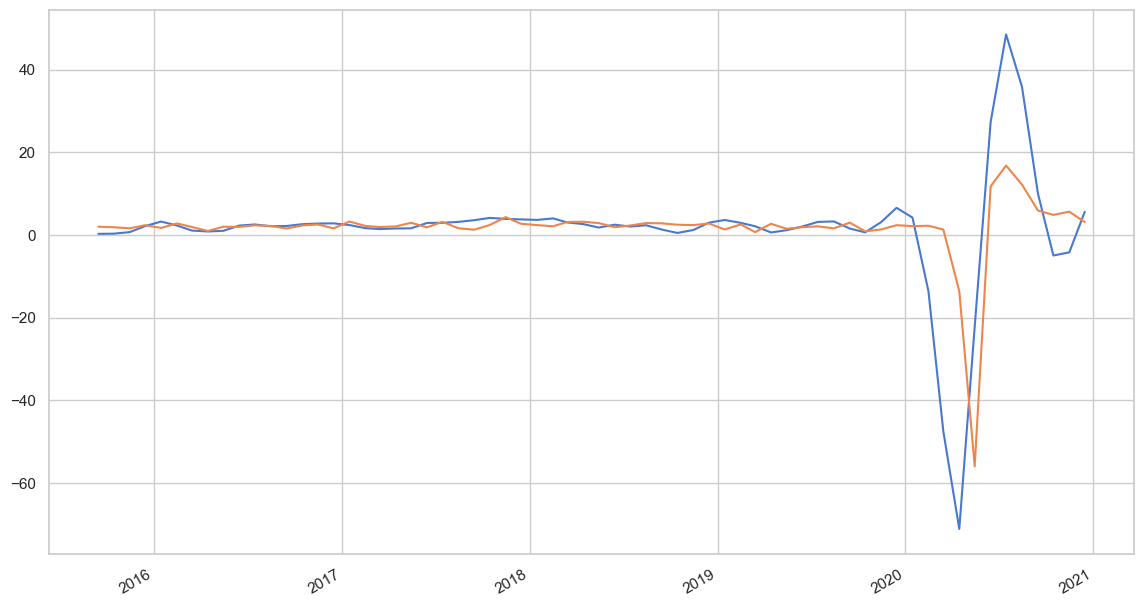

In [30]:
result['GDP_growth_Actual'].plot()
result['GDP_growth_Predicted'].plot()

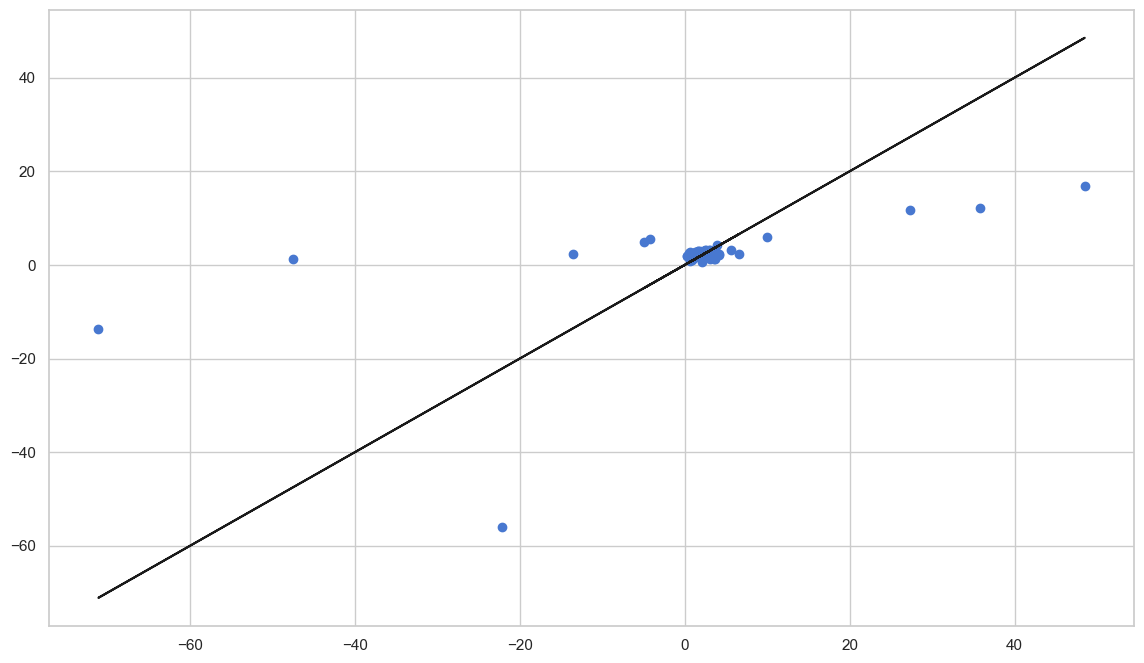

In [31]:
plt.scatter(y_test_list, y_pred_list)
plt.plot(y_test_list, y_test_list,'k-') # identity line

In [32]:
result.corr()

,GDP_growth_Actual,GDP_growth_Predicted
GDP_growth_Actual,1.000000,0.532182
GDP_growth_Predicted,0.532182,1.000000


In [33]:
metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)

11.984665735665455